In [1]:
import pandas as pd
import numpy as np
#import urllib

## Reading first time data from direct source

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
raw_data = pd.read_csv(url, header = None)
ColumnDict = {'age': 'continuous', 
'workclass': 'Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked', 
'fnlwgt': 'continuous' ,
'education': 'Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool', 
'education-num': 'continuous ',
'marital-status': 'Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse', 
'occupation': 'Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces',
'relationship': 'Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried',
'race': 'White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black', 
'sex': 'Female, Male' ,
'capital-gain': 'continuous', 
'capital-loss': 'continuous',
'hours-per-week': 'continuous', 
'native-country': 'United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands',
'Salary': '>50K, <=50K'           
}
columnList =  ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
               'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
raw_data.columns = columnList

In [2]:
raw_data = pd.read_csv('adult.xls') # reading the url file from pwd

In [3]:
raw_data.head()
raw_data.drop('Unnamed: 0', axis=1,inplace = True)   # removed unnecassry column
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Visualizing the categorical variable, to determine which one have siginificant effect on the classification

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

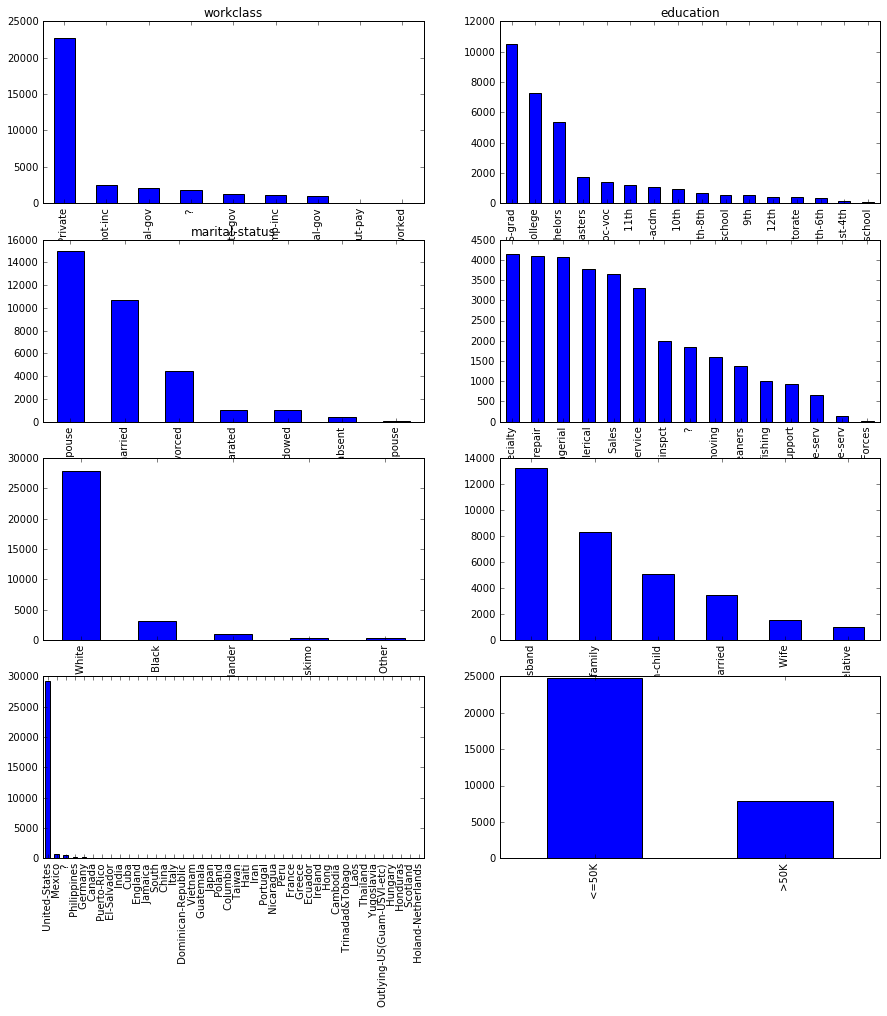

In [5]:
#A = rand(5,5)
#w, h = matplotlib.figure.figaspect(2)
fig, axs = plt.subplots(4,2,figsize=(15,15))
raw_data.workclass.value_counts().plot(kind='bar', ax= axs[0,0], colormap='winter');  axs[0,0].set_title('workclass')
raw_data.education.value_counts().plot(kind='bar', ax = axs[0,1]); axs[0,1].set_title('education')
raw_data['marital-status'].value_counts().plot(kind='bar', ax = axs[1,0]) ; axs[1,0].set_title('marital-status')
raw_data['occupation'].value_counts().plot(kind='bar', ax = axs[1,1])
raw_data['relationship'].value_counts().plot(kind='bar', ax = axs[2,1])
raw_data['race'].value_counts().plot(kind='bar', ax = axs[2,0])
raw_data['native-country'].value_counts().plot(kind='bar', ax = axs[3,0])
raw_data['Salary'].value_counts().plot(kind='bar', ax = axs[3,1])


In [6]:
data = raw_data.drop('native-country', axis=1).copy() #majority of the population are from US Americans >90%

Mapped sex and salary column to integer value

In [7]:
data['sex'] = data.sex.str.strip(' ')
data['Salary'] = data.Salary.str.strip(' ')
data['sex'] = data.sex.map({'Male':0, 'Female':1}) 
data['Salary'] = data.Salary.map({'<=50K':0, '>50K':1})
data['workclass'] = data.workclass.str.strip(' ')
data['workclass'] = data.workclass.replace('?','unknown')

In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,0


In [9]:
data['Salary']=data.Salary.astype(int)
p_data = pd.get_dummies(data.drop(labels='Salary', axis=1)) #  dummy int columns of categorical column

## Spliting data to feed to various model

In [10]:
from sklearn import cross_validation
from sklearn.model_selection import train_test_split

/Users/gauravvashisth/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X_train, X_test, y_train , y_test = train_test_split(p_data,data.loc[:,'Salary'],test_size=0.33, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape , y_test.shape)

(21815, 65) (10746, 65) (21815,) (10746,)


For simiplicity this time, I'm using only  KNN and Logistic regression model from scikit

# K-nearest neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
y_predict = KNN.predict(X_test)

# Model Accuracy

In [14]:
from sklearn import metrics

In [15]:
print(metrics.accuracy_score(y_test,y_predict))

0.778150009306


## finding the optimal neighbor's where accuracy is maximum

In [19]:

Krange = range(15,40) 
score = []
for i in Krange:
    KNN = KNeighborsClassifier(n_neighbors=i )
    KNN.fit(X_train,y_train)
    y_predict = KNN.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_predict))

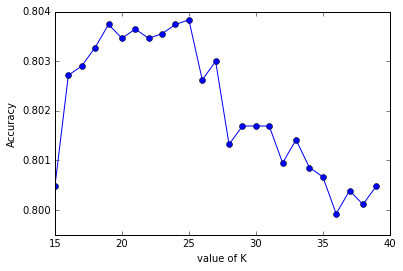

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Krange,score,'-o')
plt.xlabel('value of K')
plt.ylabel('Accuracy')

In [22]:
score

[0.80048390098641353,
 0.80271729015447613,
 0.80290340591848131,
 0.80327563744649166,
 0.80374092685650478,
 0.80346175321049695,
 0.80364786897450213,
 0.80346175321049695,
 0.80355481109249949,
 0.80374092685650478,
 0.80383398473850731,
 0.80262423227247348,
 0.80299646380048395,
 0.80132142192443701,
 0.80169365345244747,
 0.80169365345244747,
 0.80169365345244747,
 0.80094919039642654,
 0.80141447980643965,
 0.800856132514424,
 0.80067001675041871,
 0.79992555369439788,
 0.800390843104411,
 0.80011166945840317,
 0.80048390098641353]

# Accuracy using LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
Logre = LogisticRegression()
Logre.fit(X_train,y_train)
y_predictLogre= Logre.predict(X_test)
print(metrics.accuracy_score(y_test,y_predict))

0.803740926857
